# Identificação de e-mails na caixa de entrada
### Este trabalho visa classificar uma base de dados de e-mails numa caixa de entrada, identificando aqueles que configuram spam utilizando 3 diferentes técnicas de machine learning e comparando seus resultados com diferentes métricas.

## Carregando o dataset
- Linhas duplicadas estão sendo retiradas

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, 'spambase.data'))

col_names = ['word_freq_1', 'word_freq_2', 'word_freq_3', 'word_freq_4', 'word_freq_5', 'word_freq_6', 'word_freq_7', 'word_freq_8', 'word_freq_9', 'word_freq_10',
             'word_freq_11', 'word_freq_12', 'word_freq_13', 'word_freq_14', 'word_freq_15', 'word_freq_16', 'word_freq_17', 'word_freq_18', 'word_freq_19', 'word_freq_20',
             'word_freq_21', 'word_freq_22', 'word_freq_23', 'word_freq_24', 'word_freq_25', 'word_freq_26', 'word_freq_27', 'word_freq_28', 'word_freq_29', 'word_freq_30',
             'word_freq_31', 'word_freq_32', 'word_freq_33', 'word_freq_34', 'word_freq_35', 'word_freq_36', 'word_freq_37', 'word_freq_38', 'word_freq_39', 'word_freq_40',
             'word_freq_41', 'word_freq_42', 'word_freq_43', 'word_freq_44', 'word_freq_45', 'word_freq_46', 'word_freq_47', 'word_freq_48',
             'char_freq_1', 'char_freq_2', 'char_freq_3', 'char_freq_4', 'char_freq_5', 'char_freq_6', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'Class']        
        
mail = pd.read_csv("/kaggle/input/spam-mails/spambase.data", header=1, names=col_names)

# Remover as linhas duplicadas
mail2 = mail.drop_duplicates(subset=['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'],keep='first')


#mail2.Class.info()

mail2.head()

/kaggle/input/spam-mails/spambase.data


,word_freq_1,word_freq_2,word_freq_3,word_freq_4,word_freq_5,word_freq_6,word_freq_7,word_freq_8,word_freq_9,word_freq_10,...,char_freq_1,char_freq_2,char_freq_3,char_freq_4,char_freq_5,char_freq_6,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.06,0.0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.01,9.821,485,2259,1
1,0.00,0.0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.00,3.537,40,191,1
3,0.00,0.0,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.00,3.000,15,54,1
4,0.00,0.0,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.00,1.671,4,112,1
5,0.00,0.0,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.00,2.450,11,49,1


## Fazendo a "limpeza" do dataset
- Em primeiro lugar, estão sendo imputados novos valores onde havia dados faltantes utilizando o algoritmo KNN

In [3]:
from sklearn.impute import KNNImputer

features = ['word_freq_1', 'word_freq_2', 'word_freq_3', 'word_freq_4', 'word_freq_5', 'word_freq_6', 'word_freq_7', 'word_freq_8', 'word_freq_9', 'word_freq_10',
             'word_freq_11', 'word_freq_12', 'word_freq_13', 'word_freq_14', 'word_freq_15', 'word_freq_16', 'word_freq_17', 'word_freq_18', 'word_freq_19', 'word_freq_20',
             'word_freq_21', 'word_freq_22', 'word_freq_23', 'word_freq_24', 'word_freq_25', 'word_freq_26', 'word_freq_27', 'word_freq_28', 'word_freq_29', 'word_freq_30',
             'word_freq_31', 'word_freq_32', 'word_freq_33', 'word_freq_34', 'word_freq_35', 'word_freq_36', 'word_freq_37', 'word_freq_38', 'word_freq_39', 'word_freq_40',
             'word_freq_41', 'word_freq_42', 'word_freq_43', 'word_freq_44', 'word_freq_45', 'word_freq_46', 'word_freq_47', 'word_freq_48',
             'char_freq_1', 'char_freq_2', 'char_freq_3', 'char_freq_4', 'char_freq_5', 'char_freq_6', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']


imputer = KNNImputer(missing_values=0.00, n_neighbors = 5)
imputer.fit_transform(mail2[features])

array([[6.000e-02, 3.640e-01, 7.100e-01, ..., 9.821e+00, 4.850e+02,
        2.259e+03],
       [5.140e-01, 5.360e-01, 4.200e-01, ..., 3.537e+00, 4.000e+01,
        1.910e+02],
       [1.472e+00, 2.364e+00, 9.600e-01, ..., 3.000e+00, 1.500e+01,
        5.400e+01],
       ...,
       [3.000e-01, 3.020e-01, 3.000e-01, ..., 1.404e+00, 6.000e+00,
        1.180e+02],
       [9.600e-01, 8.020e-01, 6.000e-01, ..., 1.147e+00, 5.000e+00,
        7.800e+01],
       [9.100e-01, 1.256e+00, 6.500e-01, ..., 1.250e+00, 5.000e+00,
        4.000e+01]])

### Checando nível de balanceamento do dataset

In [4]:
y_mail = mail2.Class
    
counts = y_mail.value_counts()
    
percentages = 100* counts/len(y_mail)

print(percentages)

0    58.895706
1    41.104294
Name: Class, dtype: float64


- Percebe-se que há uma proporção de quase 60% de e-mails legítimos e 41% de spam, isso demonstra leve desbalanceio de classes, portanto o dataset precisa ser balanceado
## Para isso, ele é padronizado (balanceamento) e reconvertido em um dataframe do Pandas

In [5]:
from sklearn.preprocessing import StandardScaler

padr = StandardScaler()
x_padrao = padr.fit_transform(mail2[features])

x_mail = pd.DataFrame(imputer.fit_transform(x_padrao), columns=mail2[features].columns, index=mail2[features].index)

x_mail.head()

,word_freq_1,word_freq_2,word_freq_3,word_freq_4,word_freq_5,word_freq_6,word_freq_7,word_freq_8,word_freq_9,word_freq_10,...,word_freq_48,char_freq_1,char_freq_2,char_freq_3,char_freq_4,char_freq_5,char_freq_6,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.157296,-0.296152,0.874565,-0.05055,1.439722,0.354442,0.159461,0.025347,1.895049,-0.006113,...,-0.155066,-0.127022,-0.008485,-0.226991,0.023332,0.421370,-0.085220,0.118021,2.052157,3.008803
1,-0.378657,-0.296152,-0.597124,-0.05055,0.481759,-0.367087,0.449373,1.270785,0.746401,0.590634,...,-0.155066,-0.163971,-0.031264,-0.226991,-0.197989,-0.312321,-0.107439,-0.061186,-0.069865,-0.193217
3,-0.378657,-0.296152,-0.597124,-0.05055,2.429616,-0.367087,-0.299566,4.250068,-0.332632,-0.398710,...,-0.155066,-0.163971,0.295227,-0.226991,-0.416125,-0.312321,-0.107439,-0.076500,-0.189080,-0.405343
4,-0.378657,-0.296152,-0.597124,-0.05055,2.541379,-0.367087,-0.299566,-0.267698,-0.332632,0.606338,...,-0.155066,-0.163971,-0.346365,-0.226991,-0.154998,-0.096999,-0.107439,-0.114401,-0.241534,-0.315538
5,-0.378657,-0.296152,-0.597124,-0.05055,2.477514,-0.367087,-0.299566,4.323329,-0.332632,-0.398710,...,-0.155066,-0.163971,0.230688,-0.226991,-0.416125,-0.312321,-0.107439,-0.092185,-0.208154,-0.413085


## Definindo função que irá realizar a validação cruzada e calcular seus scores

In [6]:
%%time

from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

def crossvalidation (NUM_TRIALS, parameters, model, num_folds):

    # Arrays to store scores
    non_nested_scores = np.zeros(NUM_TRIALS)
    nested_scores = np.zeros(NUM_TRIALS)
    best_params = []
    trial_indices = []

    
    # Loop for each trial
    for i in range(NUM_TRIALS):

        # Choose cross-validation techniques for the inner and outer loops,
        # independently of the dataset.
        # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
        inner_cv = KFold(n_splits=num_folds, shuffle=True, random_state=i)
        outer_cv = KFold(n_splits=num_folds, shuffle=True, random_state=i)

        # Non_nested parameter search and scoring
        clf = GridSearchCV(estimator=model, param_grid=parameters, cv=inner_cv)
        clf.fit(x_mail, y_mail)
        non_nested_scores[i] = clf.best_score_
        best_params.append(clf.best_params_)
        trial_indices.append(i)

        # Nested CV with parameter optimization
        clf = GridSearchCV(estimator=model, param_grid=parameters, cv=inner_cv, scoring='f1')
        nested_score = cross_val_score(clf, X=x_mail, y=y_mail, cv=outer_cv)
        nested_scores[i] = nested_score.mean()

    score_difference = non_nested_scores - nested_scores

    print(
        "Average difference of {:6f} with std. dev. of {:6f}.".format(
            score_difference.mean(), score_difference.std()
        )
    )

    # Plot scores on each trial for nested and non-nested CV
    plt.figure()
    plt.subplot(211)
    plt.xticks(range(NUM_TRIALS), trial_indices)
    
    (non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
    (nested_line,) = plt.plot(nested_scores, color="b")
    plt.ylabel("score", fontsize="14")
    plt.legend(
        [non_nested_scores_line, nested_line],
        ["Non-Nested CV", "Nested CV"],
        loc = 'best',
        bbox_to_anchor=(0, 0.4, 0.5, 0),
        fontsize=8
    )
    plt.title(
        "Non-Nested and Nested Cross Validation on Spambase Dataset",
        x=0.5,
        y=1.1,
        fontsize="15",
    )
    
    for i, params in enumerate(best_params):
        plt.text(i, nested_scores[i], str(params), color='black', ha='center', va='bottom', fontsize=6)
    
    
    plt.show()
    
    return clf, inner_cv, outer_cv

CPU times: user 14 µs, sys: 2 µs, total: 16 µs
Wall time: 20 µs


## Definindo função para plotagem da matriz de confusão

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

def printConfMatrix (clf, inner_cv):

    y_pred = cross_val_predict(clf, x_mail, y_mail, cv=inner_cv)

    classes = np.unique(y_mail)  # Obter as classes do target

    cm = confusion_matrix(y_mail, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["e-mail", "spam"])
    disp.plot()
    plt.show()

## Aplicando ao primeiro modelo: SVM com kernel RBF

Average difference of 0.018461 with std. dev. of 0.001584.


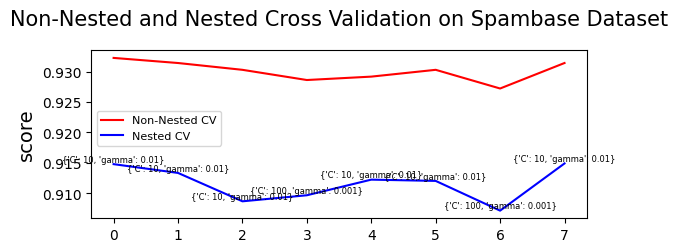

CPU times: user 9min 22s, sys: 446 ms, total: 9min 22s
Wall time: 9min 24s


In [8]:
%%time

param_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1, 0.001]}
model = SVC(kernel="rbf")

num_trials = 8
num_folds = 5

clf1, cvint1, cvext1 = crossvalidation(num_trials, param_grid, model, num_folds)

### Matriz de confusão

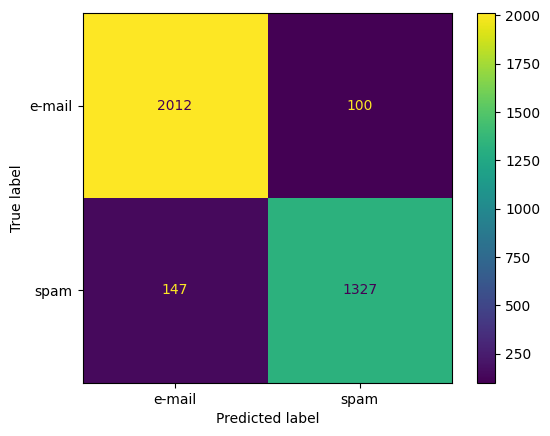

In [9]:
printConfMatrix(clf1, cvint1)

### Score F1
- Relaciona precisão e recall
- Indicativo de dataset balanceado

In [10]:
f1_score = cross_val_score(clf1, X=x_mail, y=y_mail, scoring = "f1", cv=cvext1)
print(f1_score)

[0.91695502 0.92047377 0.89419795 0.92307692 0.91986063]


## Acurácia
- Percentual de acertos brutos sobre total de elementos nas classes

In [11]:
acc_score = cross_val_score(clf1, X=x_mail, y=y_mail, scoring = "accuracy", cv=cvint1)
print(acc_score)

[0.93314763 0.93444909 0.91352859 0.93863319 0.93584379]


## Área sob curva ROC
- Fornece uma visão geral do desempenho global do modelo, independentemente do ponto de corte escolhido para a classificação
- Melhor análise do desempenho em dataset desbalanceado

In [12]:
roc_score = cross_val_score(clf1, X=x_mail, y=y_mail, scoring = "roc_auc", cv=cvint1)
print(roc_score)

[0.9745532  0.97587968 0.9663068  0.97302638 0.97404934]


## Árvore binária de decisão
- Avaliação de cross validation aninhada e não aninhada
- Métricas desse algoritmo são apresentadas após os scores de validação*

Average difference of 0.026774 with std. dev. of 0.003907.


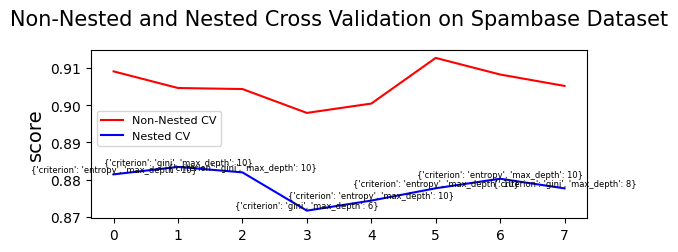

CPU times: user 49.5 s, sys: 116 ms, total: 49.6 s
Wall time: 49.7 s


In [13]:
%%time

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Set up possible values of parameters to optimize over
param_grid = {"max_depth": [6, 8, 10], "criterion": ["gini", "entropy"]}

# We will use a Decision Tree Classifier
model = DecisionTreeClassifier()

clf2, cvint2, cvext2 =  crossvalidation(num_trials, param_grid, model, num_folds)

### Matriz de confusão e cálculo da acurácia

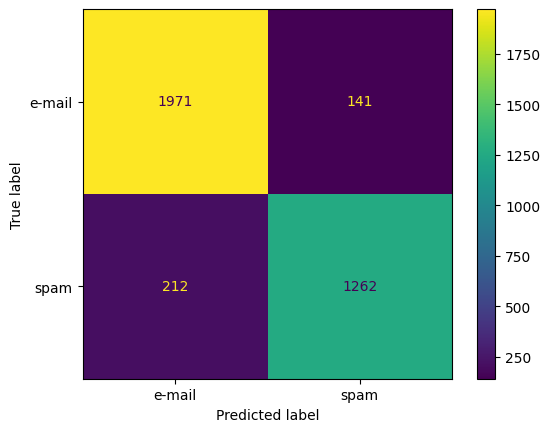

In [14]:
printConfMatrix(clf2, cvint2)

### Score F1
- Relaciona precisão e recall
- Indicativo de dataset balanceado

In [15]:
f1_score2 = cross_val_score(clf2, X=x_mail, y=y_mail, scoring = "f1", cv=cvext2)
print(f1_score2)

[0.8462867  0.89583333 0.87118644 0.88224956 0.90196078]


## Acurácia
- Percentual de acertos brutos sobre total de elementos nas classes

In [16]:
acc_score = cross_val_score(clf2, X=x_mail, y=y_mail, scoring = "accuracy", cv=cvint2)
print(acc_score)

[0.87604457 0.91352859 0.89121339 0.89958159 0.92329149]


## Área sob curva ROC
- Fornece uma visão geral do desempenho global do modelo, independentemente do ponto de corte escolhido para a classificação
- Melhor análise do desempenho em dataset desbalanceado

In [17]:
roc_score = cross_val_score(clf2, X=x_mail, y=y_mail, scoring = "roc_auc", cv=cvint2)
print(roc_score)

[0.91893024 0.93031597 0.90003764 0.92309631 0.9383581 ]


## Perceptron simples
- Avaliação de cross validation aninhada e não aninhada
- Métricas desse algoritmo são apresentadas após os scores de validação


Average difference of 0.031789 with std. dev. of 0.009063.


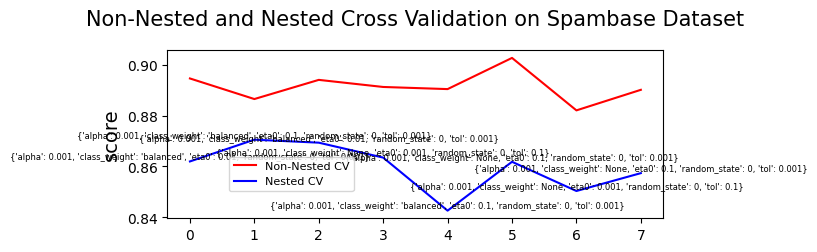

CPU times: user 6min, sys: 2min 22s, total: 8min 22s
Wall time: 4min 23s


In [20]:
%%time

import random
from sklearn.linear_model import Perceptron # Import Perceptron

# Parâmetros a serem otimizados em grid search
param_grid = {"tol" : [0.1, 0.001, 0.01], "random_state" : [ 0], "class_weight": [ 'balanced', None] , "eta0":[0.001, 0.01, 0.1], "alpha":[0.001, 0.5, 10] }

# declarando modelo
model = Perceptron()

clf3, cvint3, cvext3 = crossvalidation(num_trials, param_grid, model, num_folds)

### Matriz de confusão e cálculo da acurácia

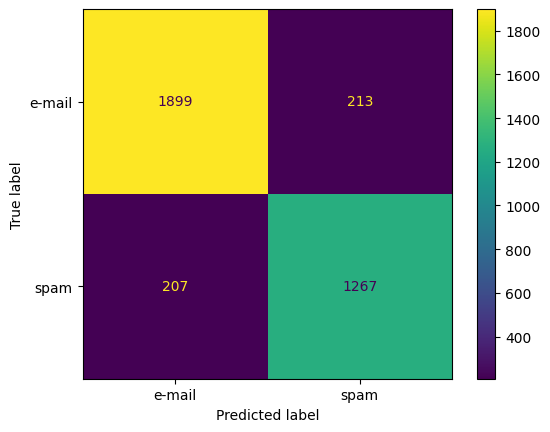

In [21]:
printConfMatrix(clf3, cvint3)

### Score F1
- Relaciona precisão e recall
- Indicativo de dataset balanceado

In [22]:
f1_score3 = cross_val_score(clf3, X=x_mail, y=y_mail, scoring = "f1", cv=cvext3)
print(f1_score3)

[0.86       0.87027915 0.85475793 0.86956522 0.83211679]


## Acurácia
- Percentual de acertos brutos sobre total de elementos nas classes

In [24]:
acc_score = cross_val_score(clf3, X=x_mail, y=y_mail, scoring = "accuracy", cv=cvint3)
print(acc_score)

[0.88300836 0.88981869 0.87866109 0.89121339 0.87168759]


## Área sob curva ROC
- Fornece uma visão geral do desempenho global do modelo, independentemente do ponto de corte escolhido para a classificação
- Melhor análise do desempenho em dataset desbalanceado

In [26]:
roc_score = cross_val_score(clf3, X=x_mail, y=y_mail, scoring = "roc_auc", cv=cvint3)
print(roc_score)

[0.95526856 0.93768451 0.93843603 0.95374557 0.93528064]
